In [1]:
# Dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import csv


ModuleNotFoundError: No module named 'api_keys_project1'

In [2]:
# Read application_data csv file
# Create application DataFrame

app_data = "application_data.csv"
application = pd.read_csv(app_data)
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Read previous_application csv file
# Create previous DataFrame

previous_app_data = "previous_application.csv"
previous_app = pd.read_csv(previous_app_data)
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Create new application_data file for selected columns only

appdata = application[["SK_ID_CURR", 
                        "TARGET",
                        "NAME_CONTRACT_TYPE",
                        "CODE_GENDER",
                        "FLAG_OWN_CAR",
                        "FLAG_OWN_REALTY",
                        "CNT_CHILDREN",
                        "AMT_INCOME_TOTAL",
                        "AMT_CREDIT",
                        "AMT_ANNUITY",
                        "AMT_GOODS_PRICE",
                        "NAME_INCOME_TYPE",
                        "NAME_EDUCATION_TYPE",
                        "NAME_FAMILY_STATUS",
                        "NAME_HOUSING_TYPE",
                        "REGION_POPULATION_RELATIVE",
                        "DAYS_BIRTH",
                        "OCCUPATION_TYPE",
                        "CNT_FAM_MEMBERS",
                        "REGION_RATING_CLIENT",
                        "WEEKDAY_APPR_PROCESS_START",
                        "ORGANIZATION_TYPE",
                        "OBS_30_CNT_SOCIAL_CIRCLE",
                        "DEF_30_CNT_SOCIAL_CIRCLE",
                        "OBS_60_CNT_SOCIAL_CIRCLE",
                        "DEF_60_CNT_SOCIAL_CIRCLE",
                        "AMT_REQ_CREDIT_BUREAU_MON",
                        "AMT_REQ_CREDIT_BUREAU_QRT",
                        "AMT_REQ_CREDIT_BUREAU_YEAR"]]

In [5]:
# Rename applications data columns - before merge
# Add 'CURR' to the column heading to denote the original application_data file

clean_appdata = appdata.rename(columns={"TARGET": "CURR_TARGET",
                                        "NAME_CONTRACT_TYPE": "CURR_NAME_CONTRACT_TYPE",
                                        "CODE_GENDER": "CURR_CODE_GENDER",
                                        "FLAG_OWN_CAR": "CURR_FLAG_OWN_CAR",
                                        "FLAG_OWN_REALTY": "CURR_FLAG_OWN_REALTY",
                                        "CNT_CHILDREN": "CURR_CNT_CHILDREN",
                                        "AMT_INCOME_TOTAL": "CURR_AMT_INCOME_TOTAL",
                                        "AMT_CREDIT": "CURR_AMT_CREDIT",
                                        "AMT_ANNUITY": "CURR_AMT_ANNUITY",
                                        "AMT_GOODS_PRICE": "CURR_AMT_GOODS_PRICE",
                                        "NAME_INCOME_TYPE": "CURR_NAME_INCOME_TYPE",
                                        "NAME_EDUCATION_TYPE": "CURR_NAME_EDUCATION_TYPE",
                                        "NAME_FAMILY_STATUS": "CURR_NAME_FAMILY_STATUS",
                                        "NAME_HOUSING_TYPE": "CURR_NAME_HOUSING_TYPE",
                                        "REGION_POPULATION_RELATIVE": "CURR_REGION_POPULATION_RELATIVE",
                                        "DAYS_BIRTH": "CURR_DAYS_BIRTH",
                                        "OCCUPATION_TYPE": "CURR_OCCUPATION_TYPE",
                                        "CNT_FAM_MEMBERS": "CURR_CNT_FAM_MEMBERS",
                                        "REGION_RATING_CLIENT": "CURR_REGION_RATING_CLIENT",
                                        "WEEKDAY_APPR_PROCESS_START": "CURR_WEEKDAY_APPR_PROCESS_START",
                                        "ORGANIZATION_TYPE": "CURR_ORGANIZATION_TYPE",
                                        "OBS_30_CNT_SOCIAL_CIRCLE": "CURR_OBS_30_CNT_SOCIAL_CIRCLE",
                                        "DEF_30_CNT_SOCIAL_CIRCLE": "CURR_DEF_30_CNT_SOCIAL_CIRCLE",
                                        "OBS_60_CNT_SOCIAL_CIRCLE": "CURR_OBS_60_SOCIAL_CIRCLE",
                                        "DEF_60_CNT_SOCIAL_CIRCLE": "CURR_DEF_60_SOCIAL_CIRCLE",
                                        "AMT_REQ_CREDIT_BUREAU_MON": "CURR_AMT_REQ_CREDIT_BUREAU_MON",
                                        "AMT_REQ_CREDIT_BUREAU_QRT": "CURR_AMT_REQ_CREDIT_BUREAU_MON",
                                        "AMT_REQ_CREDIT_BUREAU_YEAR": "CURR_AMT_REQ_CREDIT_BUREAU_YEAR" 
                                       })

In [6]:
# Create previous_application_data file with with selected columns

prevdata = previous_app[["SK_ID_PREV",
                        "SK_ID_CURR",
                        "NAME_CONTRACT_TYPE",
                        "AMT_ANNUITY",
                        "AMT_APPLICATION",
                        "AMT_CREDIT",
                        "AMT_DOWN_PAYMENT",
                        "AMT_GOODS_PRICE",
                        "WEEKDAY_APPR_PROCESS_START",
                        "NFLAG_LAST_APPL_IN_DAY",
                        "NAME_CASH_LOAN_PURPOSE",
                        "NAME_CONTRACT_STATUS",
                        "DAYS_DECISION",
                        "CODE_REJECT_REASON",
                        "NAME_CLIENT_TYPE",
                        "NAME_GOODS_CATEGORY",
                        "NAME_PORTFOLIO",
                        "NAME_PRODUCT_TYPE",
                        "CHANNEL_TYPE",
                        "NAME_SELLER_INDUSTRY",
                        "NAME_YIELD_GROUP",
                        "PRODUCT_COMBINATION",
                        "DAYS_FIRST_DRAWING",
                        "DAYS_FIRST_DUE",
                        "DAYS_LAST_DUE_1ST_VERSION",
                        "DAYS_LAST_DUE",
                        "DAYS_TERMINATION",
                        "NFLAG_INSURED_ON_APPROVAL"]]

In [7]:
# Rename the columns for previous_application_data
# Add 'PREV' to the column heading to denote the original previous file

clean_prevdata = prevdata.rename(columns={"SK_ID_PREV": "PREV_SK_ID_PREV",
                                    "NAME_CONTRACT_TYPE": "PREV_NAME_CONTRACT_TYPE",
                                    "AMT_ANNUITY": "PREV_AMT_ANNUITY",
                                    "AMT_APPLICATION": "PREV_AMT_APPLICATION",
                                    "AMT_CREDIT": "PREV_AMT_CREDIT",
                                    "AMT_DOWN_PAYMENT": "PREV_AMT_DOWN_PAYMENT",
                                    "AMT_GOODS_PRICE": "PREV_AMT_GOODS_PRICE",
                                    "WEEKDAY_APPR_PROCESS_START": "PREV_WEEKDAY_APPR_PROCESS_START",
                                    "NFLAG_LAST_APPL_IN_DAY": "PREV_NFLAG_LAST_APPL_IN_DAY",
                                    "NAME_CASH_LOAN_PURPOSE": "PREV_NAME_CASH_LOAN_PURPOSE",
                                    "NAME_CONTRACT_STATUS": "PREV_NAME_CONTRACT_STATUS",
                                    "DAYS_DECISION": "PREV_DAYS_DECISION",
                                    "CODE_REJECT_REASON": "PREV_CODE_REJECT_REASON",
                                    "NAME_CLIENT_TYPE": "PREV_NAME_CLIENT",
                                    "NAME_GOODS_CATEGORY": "PREV_NAME_GOODS_CATEGORY",
                                    "NAME_PORTFOLIO": "PREV_NAME_PORTFOLIO",
                                    "NAME_PRODUCT_TYPE": "PREV_NAME_PRODUCT_TYPE",
                                    "CHANNEL_TYPE": "PREV_CHANNEL_TYPE",
                                    "NAME_SELLER_INDUSTRY": "PREV_NAME_SELLER_INDUSTRY",
                                    "NAME_YIELD_GROUP": "PREV_NAME_YIELD_GROUP",
                                    "PRODUCT_COMBINATION": "PREV_PRODUCT_COMBINATION",
                                    "DAYS_FIRST_DRAWING": "PREV_DAYS_FIRST_DRAWING",
                                    "DAYS_FIRST_DUE": "PREV_DAYS_FIRST_DUE",
                                    "DAYS_LAST_DUE_1ST_VERSION": "PREV_DAYS_LAST_DUE_1ST_VERSION",
                                    "DAYS_LAST_DUE": "PREV_DAYS_LAST_DUE",
                                    "DAYS_TERMINATION": "PREV_DAYS_TERMINATION",
                                    "NFLAG_INSURED_ON_APPROVAL": "PREV_NFLAG_INSURED_ON_APPROVAL"    
                                         })

In [8]:
# Create one dataframe
# Merge clean_appdata and clean_prevdata
loan_data = pd.merge(clean_appdata, clean_prevdata, on='SK_ID_CURR', how='inner')
loan_data.head()

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Stone,Auto technology,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Stone,Furniture,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Country-wide,Consumer electronics,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Regional / Local,Connectivity,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [9]:
# Check Unique SK_ID_CURR

sk_id_count = loan_data["SK_ID_CURR"].nunique()
print(sk_id_count)

291057


In [10]:
# Check for duplicates on SK_ID_CURR series
loan_data.loc[loan_data[['SK_ID_CURR']].duplicated(keep='first'), :]

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Stone,Furniture,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Country-wide,Consumer electronics,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Credit and cash offices,XNA,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Country-wide,Consumer electronics,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Credit and cash offices,XNA,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Credit and cash offices,XNA,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Country-wide,Connectivity,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Credit and cash offices,XNA,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [11]:
# Create a clean DataFrame by dropping the duplicates on series SK_ID_CURR. Use .drop_duplicates()

clean_loan_data = loan_data.drop_duplicates(subset=['SK_ID_CURR'])

In [12]:
clean_loan_data.head(10)

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Stone,Auto technology,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Regional / Local,Connectivity,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
14,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Regional / Local,Consumer electronics,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0
20,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Country-wide,Consumer electronics,low_normal,POS household with interest,365243.0,-339.0,-69.0,-69.0,-66.0,0.0
25,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,Regional / Local,Consumer electronics,low_action,POS household without interest,365243.0,-418.0,-88.0,-88.0,-84.0,0.0
32,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,Stone,Furniture,low_action,POS industry without interest,365243.0,-1039.0,-769.0,-769.0,-762.0,0.0
33,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,Credit and cash offices,XNA,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
37,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,Country-wide,Connectivity,high,POS mobile with interest,365243.0,-1641.0,-1311.0,-1401.0,-1397.0,0.0


In [13]:
# Calculate loan applicant age based on CURR_DAYS_BIRTH series
# Add column for AGE
clean_loan_data['CURR_DAYS_BIRTH'].astype(float)
age = clean_loan_data['CURR_DAYS_BIRTH'] / -365
clean_loan_data['AGE'] = round(clean_loan_data['CURR_DAYS_BIRTH'] / -365, 0)


C:\Users\Brian\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
# Create Bins for Age
bins = [20, 31, 40, 50, 60, 70]
group_names = ["< 30", "31-40", "41-50", "51-60", "61 +"]

clean_loan_data["AGE RANGE"] = pd.cut(clean_loan_data["AGE"], bins, labels=group_names, include_lowest=True)


C:\Users\Brian\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
clean_loan_data.head(20)

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL,AGE,AGE RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,26.0,< 30
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,46.0,41-50
4,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,52.0,51-60
5,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0,52.0,51-60
14,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0,55.0,51-60
20,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,low_normal,POS household with interest,365243.0,-339.0,-69.0,-69.0,-66.0,0.0,46.0,41-50
25,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,low_action,POS household without interest,365243.0,-418.0,-88.0,-88.0,-84.0,0.0,38.0,31-40
32,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,low_action,POS industry without interest,365243.0,-1039.0,-769.0,-769.0,-762.0,0.0,52.0,51-60
33,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,55.0,51-60
37,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,high,POS mobile with interest,365243.0,-1641.0,-1311.0,-1401.0,-1397.0,0.0,40.0,31-40


In [16]:
clean_loan_data.count()

SK_ID_CURR                         291057
CURR_TARGET                        291057
CURR_NAME_CONTRACT_TYPE            291057
CURR_CODE_GENDER                   291057
CURR_FLAG_OWN_CAR                  291057
CURR_FLAG_OWN_REALTY               291057
CURR_CNT_CHILDREN                  291057
CURR_AMT_INCOME_TOTAL              291057
CURR_AMT_CREDIT                    291057
CURR_AMT_ANNUITY                   291045
CURR_AMT_GOODS_PRICE               290790
CURR_NAME_INCOME_TYPE              291057
CURR_NAME_EDUCATION_TYPE           291057
CURR_NAME_FAMILY_STATUS            291057
CURR_NAME_HOUSING_TYPE             291057
CURR_REGION_POPULATION_RELATIVE    291057
CURR_DAYS_BIRTH                    291057
CURR_OCCUPATION_TYPE               199817
CURR_CNT_FAM_MEMBERS               291057
CURR_REGION_RATING_CLIENT          291057
CURR_WEEKDAY_APPR_PROCESS_START    291057
CURR_ORGANIZATION_TYPE             291057
CURR_OBS_30_CNT_SOCIAL_CIRCLE      290283
CURR_DEF_30_CNT_SOCIAL_CIRCLE     

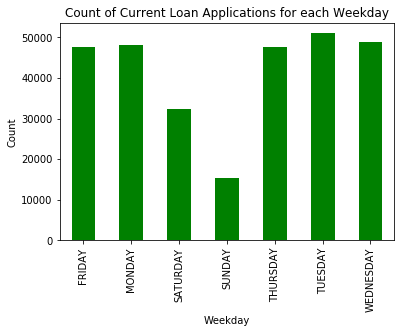

,CURR_WEEKDAY_APPR_PROCESS_START
CURR_WEEKDAY_APPR_PROCESS_START,
FRIDAY,47543
MONDAY,48040
SATURDAY,32311
SUNDAY,15462
THURSDAY,47723
TUESDAY,51017
WEDNESDAY,48961


In [17]:
#Creating a dataframe grouping by the column 'CURR_WEEKDAY_APPR_PROCESS_START'
days_group = clean_loan_data.groupby('CURR_WEEKDAY_APPR_PROCESS_START')

#Record count number of data points for each day
days_group_count = pd.DataFrame(days_group['CURR_WEEKDAY_APPR_PROCESS_START'].count())

#Bar chart based off of the group series
loan_weekdays_chart = days_group_count.plot(kind='bar', title="Count of Current Loan Applications for each Weekday", color="green", legend=None)

#xlabel and ylabels
loan_weekdays_chart.set_xlabel("Weekday")
loan_weekdays_chart.set_ylabel("Count")

plt.show()

#Display count values
days_group_count

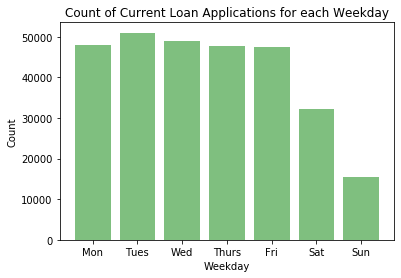

Most loan applications were submitted during the weekdays, with very few submissions on Sunday.


In [19]:
#Cleaning the "Count of Current Loan Applications for each Weekday" bar chart
#to display bar chart xlabels in the correct order of days of the week
cats = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
day_count_cats= [48040, 51017, 48961, 47723, 47543, 32311, 15462]

#Create a new bar plot based off of the group series
loan_weekdays_chart2=plt.bar(cats, day_count_cats, color='green', alpha=0.5, align='center')

#xlabel and ylabels
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.title("Count of Current Loan Applications for each Weekday")

#Save the figure
plt.savefig("Images/AppsbyWeekdayBarChart.png")

plt.show()

print(f"Most loan applications were submitted during the weekdays, with very few submissions on Sunday.")

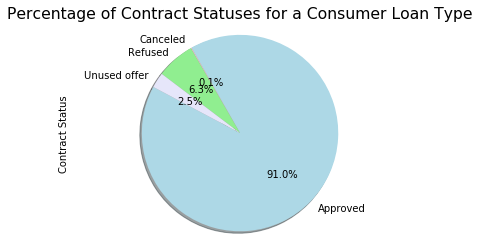

Consumer Loans had a 93.5% approval rate compared to the Cash Loan and Revolving Loan Types.


In [20]:
#Dataframe for consumer loan'PREV_NAME_CONTRACT_TYPE'
consumer_loan_type=clean_loan_data.loc[clean_loan_data['PREV_NAME_CONTRACT_TYPE'] == "Consumer loans"]

#Dataframe grouping by the 'PREV_NAME_CONTRACT_STATUS' column
consumerloan_status_group = consumer_loan_type.groupby('PREV_NAME_CONTRACT_STATUS')

#dataframe counting the number of data points for each contract status type
consumerloan_status_group_count = pd.DataFrame(consumerloan_status_group['PREV_NAME_CONTRACT_STATUS'].count())

#Labels for pie chart
consumerloan_statuses = list(consumerloan_status_group_count.index.values)
consumerloan_statuses_count = consumerloan_status_group_count['PREV_NAME_CONTRACT_STATUS']

#The colors of each section of the pie chart
colors = ["lightblue", "pink", "lightgreen", "lavender"]

#Create the pie chart based on values
plt.pie(consumerloan_statuses_count, labels=consumerloan_statuses, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=152)
plt.rcParams['font.size'] = 13
plt.title("Percentage of Contract Statuses for a Consumer Loan Type")
plt.ylabel("Contract Status")
plt.axis("equal")
plt.savefig("Images/ConsumerloanStatusesPieChart.png")
plt.show()

print(f"Consumer Loans had a 93.5% approval rate compared to the Cash Loan and Revolving Loan Types.")

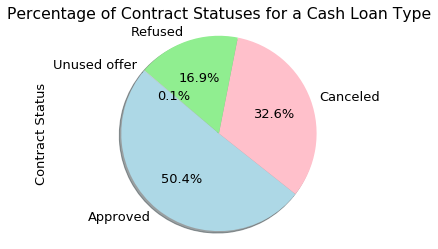

In [21]:
#Dataframe for cash loan'PREV_NAME_CONTRACT_TYPE'
cash_loan_type=clean_loan_data.loc[clean_loan_data['PREV_NAME_CONTRACT_TYPE'] == "Cash loans"]

#Dataframe grouping by the 'PREV_NAME_CONTRACT_STATUS' column
cashloan_status_group = cash_loan_type.groupby('PREV_NAME_CONTRACT_STATUS')

#dataframe counting the number of data points for each contract status type
cashloan_status_group_count = pd.DataFrame(cashloan_status_group['PREV_NAME_CONTRACT_STATUS'].count())

#Labels for pie chart
cashloan_statuses = list(cashloan_status_group_count.index.values)
cashloan_statuses_count = cashloan_status_group_count['PREV_NAME_CONTRACT_STATUS']

#The colors of each section of the pie chart
colors = ["lightblue", "pink", "lightgreen", "lavender"]

#Create the pie chart based on values
plt.pie(cashloan_statuses_count, labels=cashloan_statuses, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 13
plt.title("Percentage of Contract Statuses for a Cash Loan Type")
plt.ylabel("Contract Status")
plt.axis("equal")

plt.savefig("Images/CashloanStatusesPieChart.png")
plt.show()

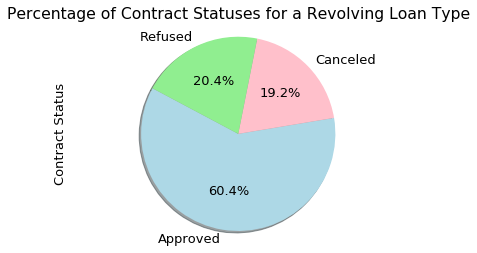

In [22]:
#Dataframe for revolving loan'PREV_NAME_CONTRACT_TYPE'
revolving_loan_type=clean_loan_data.loc[clean_loan_data['PREV_NAME_CONTRACT_TYPE'] == "Revolving loans"]

#Dataframe grouping by the 'PREV_NAME_CONTRACT_STATUS' column
revolvingloan_status_group = revolving_loan_type.groupby('PREV_NAME_CONTRACT_STATUS')

#dataframe counting the number of data points for each contract status type
revolvingloan_status_group_count = pd.DataFrame(revolvingloan_status_group['PREV_NAME_CONTRACT_STATUS'].count())

#Labels for pie chart
revolvingloan_statuses = list(revolvingloan_status_group_count.index.values)
revolvingloan_statuses_count = revolvingloan_status_group_count['PREV_NAME_CONTRACT_STATUS']

#The colors of each section of the pie chart
colors = ["lightblue", "pink", "lightgreen", "lavender"]

#Create the pie chart based on values
plt.pie(revolvingloan_statuses_count, labels=revolvingloan_statuses, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=152)
plt.rcParams['font.size'] = 13
plt.title("Percentage of Contract Statuses for a Revolving Loan Type")
plt.ylabel("Contract Status")
plt.axis("equal")
plt.savefig("Images/RevolvingloanStatusesPieChart.png")
plt.show()

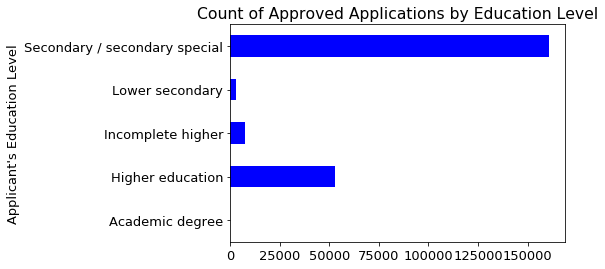

Most applicants who were approved had a secondary or special secondary educational background.
There was a total of 160,874 approved apps for those with secondary/special secondary education level.


In [23]:
#Dataframe for approved which is (approved and unused offer) loans using 'PREV_NAME_CONTRACT_STATUS' column

approved_loans=clean_loan_data.loc[clean_loan_data['PREV_NAME_CONTRACT_STATUS'].isin(['Approved','Unused offer'])]
                                                   
#Creating a dataframe grouping by the column 'CURR_NAME_EDUCATION_TYPE'
education_group = approved_loans.groupby('CURR_NAME_EDUCATION_TYPE')

#Record count number of data points for each education level
education_group_count = pd.DataFrame(education_group['CURR_NAME_EDUCATION_TYPE'].count())

#Create bar graph
approvedloan_education_chart = education_group_count.plot(kind='barh', title="Count of Approved Applications by Education Level", color="blue", legend=None)
# Set the ylabel using class methods
approvedloan_education_chart.set_ylabel("Applicant's Education Level")

# Save the figure
plt.savefig("Images/ApprovedbyEducationBarChart.png")
plt.show()

print(f"Most applicants who were approved had a secondary or special secondary educational background.")
print(f"There was a total of 160,874 approved apps for those with secondary/special secondary education level.")

      

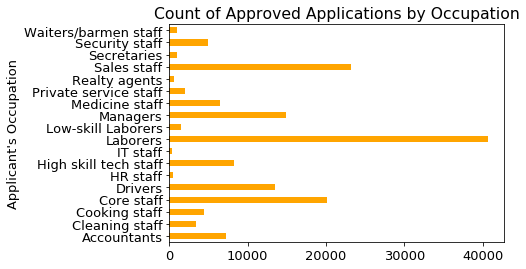

Most applicants who were approved were Laborers.
40,726 laborers had their loan application approved.


In [24]:
#Creating a dataframe grouping by the column 'CURR_OCCUPATION_TYPE'
occupation_group = approved_loans.groupby('CURR_OCCUPATION_TYPE')

#Record count number of data points for each occupation
occupation_group_count=pd.DataFrame(occupation_group['CURR_OCCUPATION_TYPE'].count())

#Create bar graph
approvedloan_occupation_chart = occupation_group_count.plot(kind='barh', title="Count of Approved Applications by Occupation", color="orange", legend=None)
# Set the ylabel using class methods
approvedloan_occupation_chart.set_ylabel("Applicant's Occupation")

#grouped = df.groupby('mygroups').sum().reset_index()
#grouped.sort_values('mygroups', ascending=False)

# Save the figure
plt.savefig("Images/ApprovedbyOccupationBarChart.png")
plt.show()
print(f"Most applicants who were approved were Laborers.")
print(f"40,726 laborers had their loan application approved.")

In [25]:
occupation_group_count


,CURR_OCCUPATION_TYPE
CURR_OCCUPATION_TYPE,
Accountants,7198
Cleaning staff,3355
Cooking staff,4454
Core staff,20139
Drivers,13463
HR staff,403
High skill tech staff,8215
IT staff,357
Laborers,40726


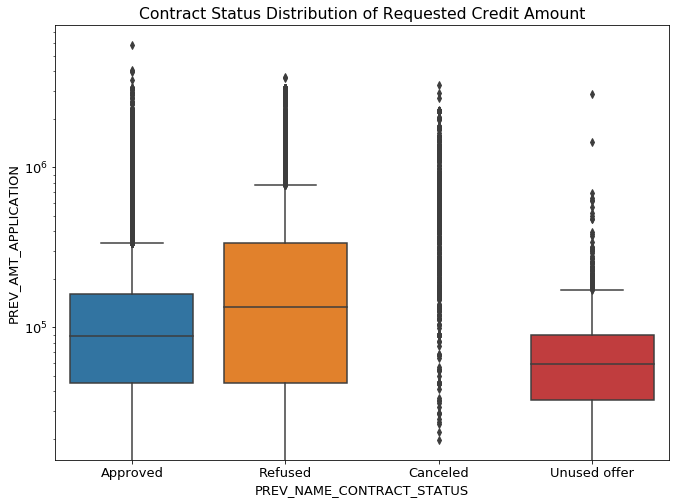

The requested credit amounts are all normally distributed excluding the unused offer status because of the low count of data points.
The median requested credit amount for approved contracts is 87714.0 rupees.
The median requested credit amount for refused contracts is  135000.0 rupees.
It seems that there are a lot of outliers within the Approved status box plot.


In [26]:
#Create boxplot for name
import seaborn as sns

plt.figure(figsize=(11,8))
creditamount_status_boxplot = sns.boxplot(x = 'PREV_NAME_CONTRACT_STATUS' , y = 'PREV_AMT_APPLICATION',data = clean_loan_data)
creditamount_status_boxplot.set_yscale('log')
creditamount_status_boxplot.set_title('Contract Status Distribution of Requested Credit Amount')

plt.savefig("Images/ContractStatusDistBoxPlot.png")
plt.show()

approved_loans2=clean_loan_data.loc[clean_loan_data['PREV_NAME_CONTRACT_STATUS'].isin(['Approved'])]
refused_loans=clean_loan_data.loc[clean_loan_data['PREV_NAME_CONTRACT_STATUS'].isin(['Refused'])]

approved_amount_median=approved_loans2['PREV_AMT_APPLICATION'].median()
refused_amount_median=refused_loans['PREV_AMT_APPLICATION'].median()

print(f"The requested credit amounts are all normally distributed excluding the unused offer status because of the low count of data points.")
print(f"The median requested credit amount for approved contracts is {approved_amount_median} rupees.")
print(f"The median requested credit amount for refused contracts is  {refused_amount_median} rupees.")
print(f"It seems that there are a lot of outliers within the Approved status box plot.")

In [27]:
age_df= clean_loan_data[["SK_ID_CURR","AGE","AGE RANGE","PREV_NAME_CONTRACT_STATUS"]]
conditions = [(age_df["PREV_NAME_CONTRACT_STATUS"] == 'Approved'),(age_df["PREV_NAME_CONTRACT_STATUS"] == 'Canceled'),(age_df["PREV_NAME_CONTRACT_STATUS"] =='Refused'),(age_df["PREV_NAME_CONTRACT_STATUS"] =='Unused offer')]
values = [1,0,0,1]
age_df['APPROVAL COUNT'] = np.select(conditions,values)

#approved_agesummary_df = age_df.loc[age_df["PREV_NAME_CONTRACT_STATUS"]=="Approved", :]
agesum_summary_df = age_df.groupby(['AGE RANGE'], as_index=False).agg({"APPROVAL COUNT": sum})
agecount_summary_df = age_df.groupby(['AGE RANGE'], as_index=False).agg({"APPROVAL COUNT": "count"})
merge_df = pd.merge(agesum_summary_df, agecount_summary_df, on="AGE RANGE")
merge_df = merge_df.rename(columns={"APPROVAL COUNT_x":"Approvals", "APPROVAL COUNT_y":"Applications"})
merge_df['Rejections'] = merge_df['Applications'] - merge_df['Approvals']

merge_df['Approval Rate'] =(merge_df['Approvals']/merge_df['Applications']).astype(float)


C:\Users\Brian\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


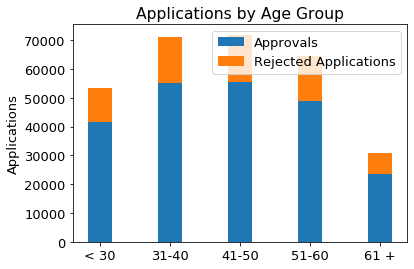

There is no direct correlation between age and approval rates. The average approval rate accross all age ranges is 77%


In [28]:
labels = ['< 30', '31-40', '41-50', '51-60', '61 +']
approvals = merge_df['Approvals']
rejections = merge_df['Rejections']

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, approvals, width, label='Approvals')
ax.bar(labels, rejections, width, bottom=approvals,
       label='Rejected Applications')

ax.set_ylabel('Applications')
ax.set_title('Applications by Age Group')
ax.legend()

plt.savefig("Images/ApplicantsbyAgeGroupBarPlot.png")
plt.show()

print("There is no direct correlation between age and approval rates. The average approval rate accross all age ranges is 77%")

In [32]:
import csv
import quandl
#from api_keys_project1 import stock_api_key
#quandl.ApiConfig.api_key = stock_api_key

quandl.ApiConfig.api_key = "He_gAqaLmRXFqjy82dw6"

BSE500 = quandl.get('BSE/BSE500',start_date ="2019-01-01",end_date="2019-12-31")

BSE500data= pd.concat([BSE500.head(1), BSE500.tail(1)])
BSE500data['Open'] = BSE500data['Open'].astype(int)
BSE500data['Open'].round(0)
BSE500data['High'] = BSE500data['High'].astype(int)
BSE500data['High'].round(0)
BSE500data['Low'] = BSE500data['Low'].astype(int)
BSE500data['Low'].round(0)
BSE500data['Close'] = BSE500data['Close'].astype(int)
BSE500data['Close'].round(0)

BSE500ly = quandl.get('BSE/BSE500',start_date ="2018-01-01",end_date="2018-12-31")

BSE500dataly= pd.concat([BSE500ly.head(1), BSE500ly.tail(1)])
BSE500dataly['Open'] = BSE500dataly['Open'].astype(int)
BSE500dataly['Open'].round(0)
BSE500dataly['High'] = BSE500dataly['High'].astype(int)
BSE500dataly['High'].round(0)
BSE500dataly['Low'] = BSE500dataly['Low'].astype(int)
BSE500dataly['Low'].round(0)
BSE500dataly['Close'] = BSE500dataly['Close'].astype(int)
BSE500dataly['Close'].round(0)


openpricety= BSE500data.loc["2019-01-01", "Open"]
closepricety= BSE500data.loc["2019-12-31", "Close"]
yearlypctchangety =(openpricety/closepricety)-1

openpricely= BSE500dataly.loc["2018-01-01", "Open"]
closepricely= BSE500dataly.loc["2018-12-31", "Close"]
yearlypctchangely =(openpricely/closepricely)-1
print(yearlypctchangety)
print(yearlypctchangely)

ModuleNotFoundError: No module named 'api_keys_project1'

In [ ]:
question6_df= clean_loan_data[["SK_ID_CURR","PREV_DAYS_DECISION","PREV_NAME_CONTRACT_STATUS"]]
crit_period = (question6_df.PREV_DAYS_DECISION < -365) & (question6_df.PREV_DAYS_DECISION > -730)
question6_df = question6_df[crit_period]

conditions = [(question6_df["PREV_NAME_CONTRACT_STATUS"] == 'Approved'),(question6_df["PREV_NAME_CONTRACT_STATUS"] == 'Canceled'),(question6_df["PREV_NAME_CONTRACT_STATUS"] =='Refused'),(question6_df["PREV_NAME_CONTRACT_STATUS"] =='Unused offer')]
values = [1,0,0,1]
question6_df['APPROVAL COUNT'] = np.select(conditions,values)

agesum2_summary_df = question6_df.groupby(['PREV_NAME_CONTRACT_STATUS'], as_index=False).agg({"APPROVAL COUNT": sum})
agecount2_summary_df = question6_df.groupby(['PREV_NAME_CONTRACT_STATUS'], as_index=False).agg({"APPROVAL COUNT": "count"})
merge2_df = pd.merge(agesum2_summary_df, agecount2_summary_df, on="PREV_NAME_CONTRACT_STATUS")
merge2_df = merge2_df.rename(columns={"APPROVAL COUNT_x":"Approvals", "APPROVAL COUNT_y":"Applications"})
merge2_df['Rejections'] = merge2_df['Applications'] - merge2_df['Approvals']

question6a_df= clean_loan_data[["SK_ID_CURR","PREV_DAYS_DECISION","PREV_NAME_CONTRACT_STATUS"]]
crit2_period = (question6a_df.PREV_DAYS_DECISION < 0) & (question6a_df.PREV_DAYS_DECISION > -365)
question7_df = question6a_df[crit2_period]

conditions = [(question7_df["PREV_NAME_CONTRACT_STATUS"] == 'Approved'),(question7_df["PREV_NAME_CONTRACT_STATUS"] == 'Canceled'),(question7_df["PREV_NAME_CONTRACT_STATUS"] =='Refused'),(question7_df["PREV_NAME_CONTRACT_STATUS"] =='Unused offer')]
values = [1,0,0,1]
question7_df['APPROVAL COUNT'] = np.select(conditions,values)

agesum1_summary_df = question7_df.groupby(['PREV_NAME_CONTRACT_STATUS'], as_index=False).agg({"APPROVAL COUNT": sum})
agecount1_summary_df = question7_df.groupby(['PREV_NAME_CONTRACT_STATUS'], as_index=False).agg({"APPROVAL COUNT": "count"})
merge1_df = pd.merge(agesum1_summary_df, agecount1_summary_df, on="PREV_NAME_CONTRACT_STATUS")
merge1_df = merge1_df.rename(columns={"APPROVAL COUNT_x":"Approvals", "APPROVAL COUNT_y":"Applications"})
merge1_df['Rejections'] = merge1_df['Applications'] - merge1_df['Approvals']

mergef_df = pd.merge(merge1_df, merge2_df, on="PREV_NAME_CONTRACT_STATUS")
mergef_df = mergef_df.rename(columns={"Approvals_x":"2019 Approvals","Rejections_x":"2019 Rejections", "Applications_x":"2019 Applications","Approvals_y":"2018 Approvals","Rejections_y":"2018 Rejections", "Applications_y":"2018 Applications"})
mergef_df['app%ty']=mergef_df['2019 Approvals']/mergef_df['2019 Applications'].sum()
mergef_df['app%ly']=mergef_df['2018 Approvals']/mergef_df['2018 Applications'].sum()
mergef_df

finaltyapprate = mergef_df['app%ty'].sum()
finallyapprate = mergef_df['app%ly'].sum()


data = [['2018',finallyapprate,yearlypctchangely], ['2019',finaltyapprate,yearlypctchangety]] 
  

api_df = pd.DataFrame(data, columns = ['Year', 'Approval Rate','Market Performance']) 
api_df

In [ ]:
x_axis = np.arange(len(api_df))
tick_locations = [value for value in x_axis]

points_stock = api_df['Market Performance']
points_approval = api_df['Approval Rate']
stock = plt.plot(x_axis, points_stock, marker="+",color="blue", linewidth=1, label="Bombay BSE500 Index YoY Performance Change")
approval= plt.plot(x_axis, points_approval, marker="s", color="Red", linewidth=1, label="Approval Rate")
plt.legend(loc="best")
plt.xticks(tick_locations,api_df["Year"], rotation="vertical")
plt.xlabel("Years")
plt.ylabel("Percent")
plt.title("India Market Performance Compared with India's Loan Approval Rates")

plt.savefig("Images/IndiaMarketPerformaceLinePlot.png")
plt.show()

print("While there is direct correlation between market performance and approval rates there is not enough data to support market performance influences loans approval rates.")


In [ ]:
# Create a DataFrame with CURR_AMT_CREDIT (loan amount) with Age Ranges, regardless of approvals
age_data = clean_loan_data[["SK_ID_CURR", 
                            "CURR_AMT_INCOME_TOTAL",
                            "CURR_AMT_CREDIT",
                            "CURR_AMT_ANNUITY",
                            "AGE",
                            "AGE RANGE"]]
age_data.head()

In [ ]:
# Create Age Range Summary of Totals Applicants Per age and income level and loan amount
# Groupby Age Range
age_count_df = age_data.groupby(["AGE RANGE"])
tot_age_count = age_count_df["SK_ID_CURR"].nunique()

# Average Loan Amount by Age
avg_loan_by_age = round(age_count_df["CURR_AMT_CREDIT"].mean(),0)

# Average Income Amount by Age
avg_income_by_age = round(age_count_df["CURR_AMT_INCOME_TOTAL"].mean(),0)

# Summary Data Frame of Age Range

age_summary = pd.DataFrame({"Loan Applicant Count by Age": tot_age_count,
                           "Average Income": avg_income_by_age,
                           "Average Loan Amount": avg_loan_by_age})
age_summary

In [ ]:
# For Scatter Plot DataFrame - Need Age Only and not Age Range for Plotting
age_only = clean_loan_data[["SK_ID_CURR", 
                            "CURR_AMT_INCOME_TOTAL",
                            "CURR_AMT_CREDIT",
                            "CURR_AMT_ANNUITY",
                            "AGE"]]
age_only.head()

In [ ]:
# Change data type for AGE series, for groupby function
age_only['AGE'].astype('category')

In [ ]:
# Create Age Only Summary for Scatter Plot
agecount = age_only.groupby(["AGE"])
totagecount = agecount["AGE"].nunique()

# Average Loan Amount by Age
avgloan = round(agecount["CURR_AMT_CREDIT"].mean(),0)

# Average Income Amount by Age
avgincome = round(agecount["CURR_AMT_INCOME_TOTAL"].mean(),0)

# Summary Data Frame of Age Range

age_only_summary = pd.DataFrame({"Average Income by Age Group": avgincome,
                           "Average Loan Amount by Age Group": avgloan})
age_only_summary

In [ ]:
# Reset age_only_summary dataframe Index for scatter plot

age_only_summary.reset_index(level=0, inplace=True)
age_only_summary

In [ ]:
import scipy.stats as st
from scipy.stats import linregress
# CORRELATION AND REGRESSION LINE
# Generate a scatter plot age vs average loan amount
x_values = age_only_summary["AGE"]
y_values = age_only_summary["Average Loan Amount by Age Group"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o', facecolor='blue', edgecolor='black')
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(30,450000), fontsize=15, color='red')
plt.title("Loan Applicant Age vs Average Loan Amount (in Rupees)")
plt.xlabel("Applicant Age")
plt.ylabel("Average Loan Amount by Age")
plt.grid()

plt.savefig("Images/AgeAvgLoanScatterPlot.png")
plt.show()

print('----------------------------------------------------------------------------------')
print("Obeservation: Average loan increased with age.")
print("Obeservation: At about age 55, the average loans decrease with an increase in age.")

In [ ]:
# Save Scatter Plot image
plt.tight_layout()
plt.show()

In [ ]:
df_status = clean_loan_data[["PREV_NAME_CONTRACT_STATUS","CURR_AMT_CREDIT"]]
df_status.groupby(by='PREV_NAME_CONTRACT_STATUS').describe()

In [ ]:
print("There is no correlation between the credit amount request and wheter it was approved or not.")

In [ ]:
frame_df = pd.DataFrame({
    "": ["Approved", "Unapproved", "Total"],
    "Number of Loans": [224045, 67012, 291057],
    "Percentage": [77, 23, 100]
})
print(frame_df)
print("The overall approval rate was 77 percent")